<a href="https://colab.research.google.com/github/kousikreddy-04/PRODIFY_DS/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/German_Credit_Card_Dataset.csv")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [5]:
'''Encode all categorical features using one-hot encoding. A feature with n values is
encoded using (n-1) values, retaining the first one (drop_first = True)'''
X_features = list(df.columns)
X_features.remove('status')
encoded_df = pd.get_dummies(df[X_features],drop_first=True)
print(list(encoded_df.columns))

['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72', 'present_emp_since_A73', 'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93', 'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174']


In [6]:
#Make independent features of the encoded frame as X and column 'status' as dependent feature.
X = encoded_df
Y = df['status']

In [7]:
#Divide data into 70% training and 30% as testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [9]:
#Train a decision tree model using Gini INdex and depth of 3
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
#Make predictions on test/validation data
pred_y = clf.predict(X_test)

In [11]:
#Print the confusion matrix, accuracy and AUC score of this model on test set
from sklearn import metrics
print("Confusion Matrix is\n",metrics.confusion_matrix(pred_y, y_test))
print("Accuracy is", metrics.accuracy_score(pred_y,y_test))
print("AUC Score is", metrics.roc_auc_score(pred_y, y_test))

Confusion Matrix is
 [[198  71]
 [ 11  20]]
Accuracy is 0.7266666666666667
AUC Score is 0.6906103849382419


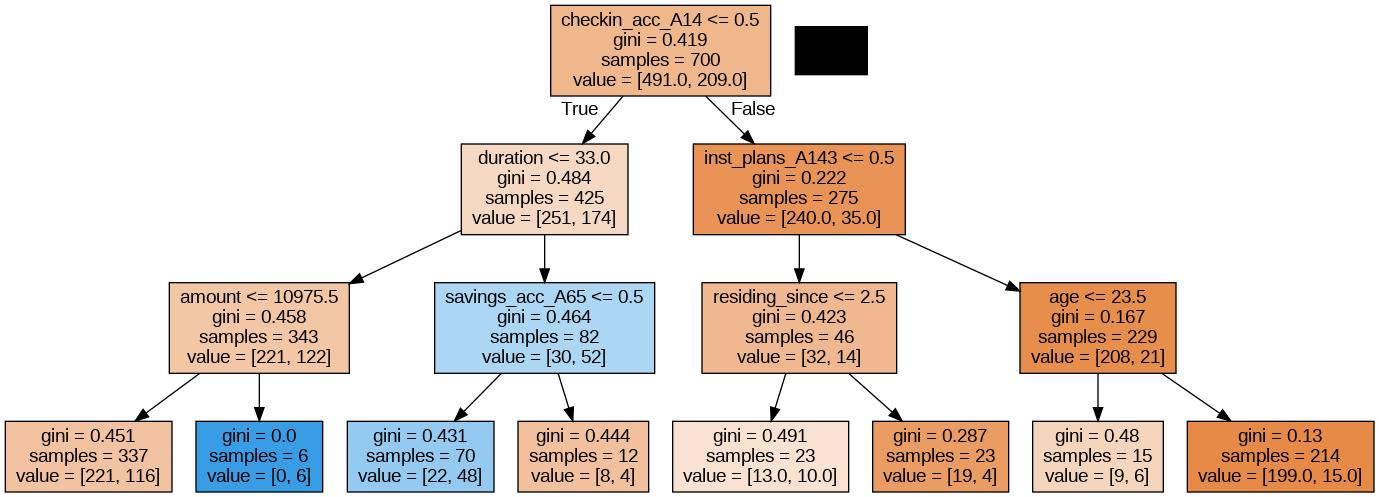

In [12]:
#Visualize the tree using grapghviz and pydotplus libraries
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file = "tree.odt", feature_names = X_train.columns, filled = True)
graph = pdot.graphviz.graph_from_dot_file("tree.odt")
graph.write_jpg("tree.png")
Image(filename = "tree.png")